# Polynomial Regression Using Batch Gradient Descent Optimisation

Both feature scaling and regularisation are performed

##### Step 1: Get Dataset

In [76]:
# import required packages
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# read in the dataset as entered by terminal
path = "cancer.csv"
dataframe = pd.read_csv(path) 
dataframe

,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,sy11etry_1ean,fractal_di1ension_1ean,...,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [77]:
# convert dataframe into ndarray for numpy
data = dataframe.to_numpy(dtype = np.float64)

# print relevant metadata
m = data.shape[0]
n = data.shape[1]-1  # -1 since last column is target variable 

print("For This Dataset:")
print("m = ", m)
print("n = ", n) 

For This Dataset:
m =  569
n =  30


##### Step 2: Partition Data

In [78]:
# get counts
trainCount = int(0.8*m)
testCount = m - trainCount

# training set
X_train = data[:trainCount, :n]
Y_train = data[:trainCount, n]

# testing set
X_test = data[trainCount:, :n]
Y_test = data[trainCount:, n]

##### Step 3: Define Hypothesis Function 

In [169]:
# does sigmoid function
def sigmoid(X):
    return 1/np.add(np.exp(np.negative(X)),1)

# multiplies theta and x
def dotTX(theta, X):
    return np.dot(X, np.transpose(theta))

# actual hyp function
def hypothesis(theta, X):
    return sigmoid(dotTX(theta, X))

##### Step 4: Define Batch Gradient Descent Function 

In [216]:
def cost_function(theta, X, Y):
    mX = X.shape[0]
    hyp = hypothesis(theta, X)
    #print(hypothesis(theta, X))
    #print(dotTX(theta,X))
    #print(theta,X)
    
    lg_hyp = np.log(hyp)
    m_lg_hyp = np.log(1.0000000001-hyp)
    total_cost = -(1/mX) * np.sum(np.add(np.dot(Y, lg_hyp), np.dot(1-Y, m_lg_hyp)))
    return total_cost

def differential(theta, X, Y, alpha):
    mX = X.shape[0]
    diff = (alpha/mX) * np.dot(np.transpose(X), 
                           np.subtract(hypothesis(theta, X), Y))
    return diff

def BGD(theta, alpha, num_iters, h, X, Y, n):
    # cost is a 1-D matrix of size num_iters, all originally 1s
    cost = np.ones(num_iters)

    # for each iteration
    for i in range(0, num_iters):
        # update theta
        #print(cost_function(theta, X, Y))
        theta = np.subtract(theta,differential(theta, X, Y, alpha))
        # print(differential(theta, X, Y, alpha))
        # print(theta)
        
        #print("\n\n")
        # get new hypothesis and store cost for this iteration
        cost[i] = cost_function(theta, X, Y)
        #print(cost)
        
    # convert theta into 1 row and n+1 columns and return with cost
    theta = np.reshape(theta, (1, n+1))
    return theta, cost

##### Step 5: Define Logistic Regression Function

In [217]:
def logisticRegression(X, y, alpha, num_iters):
    # n is number of columns in X
    n = X.shape[1]
    
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    
    # initializing the parameter vector with 0s and calculate initial hypothesis
    theta = np.dot(0.5, np.ones(n+1))
    #print(theta)
    h = hypothesis(theta, X)
    #print(h)
    
    # perform batch gradient descent and return theta and cost
    theta, cost = BGD(theta, alpha, num_iters, h, X, y, n)
    return theta, cost

##### Step 6: Perform Logistic Regression And Output Error Measures

In [218]:
# calculates mean error, mean square error and mean root_square error
def errorAnalysis(X, Y, theta):
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1)) 
    X = np.concatenate((one_column, X), axis = 1)
    
    # get predicted values according to theta
    h_test = hypothesis(theta, X)
    
    # calculate difference between predicted and actual, square of this and then divide by Y of this.
    h_test = h_test.flatten()
    
    correctCount = 0
    for res in range(len(h_test)):
        if h_test[res] < 0.5 and Y[res] == 0:
            correctCount += 1
        if h_test[res] >= 0.5 and Y[res] == 1:
            correctCount += 1
            
    print("% Correctly Classified => ", (correctCount/len(h_test))*100)

[Theta Values]:
  [[ 0.44436553  0.1215499   0.20196925 -0.82997895  0.00111386  0.50294246
   0.52917525  0.54065445  0.51707718  0.50197866  0.50002877  0.48273685
   0.39292965  0.51867277  0.05531251  0.50037123  0.50628681  0.50786811
   0.5019928   0.50107629  0.50032285  0.09936592  0.20419668  0.10432407
   0.05392634  0.50771031  0.60193975  0.62107517  0.53519596  0.51861574
   0.5071936 ]]
[Error Analysis]:
% Correctly Classified =>  95.6140350877193


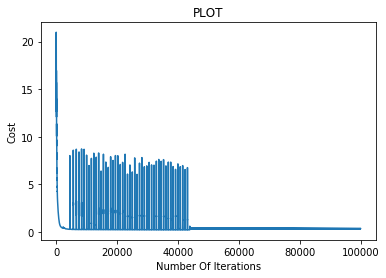


[Time Analysis]:
CPU times: user 6.57 s, sys: 66.9 ms, total: 6.64 s
Wall time: 6.91 s


In [219]:
%%time

# call function
num_iters = 100000
learning_rate = 0.0001
theta, cost = logisticRegression(X_train, Y_train, learning_rate, num_iters)

# print thetas
print("[Theta Values]:\n ", theta)

# analyse error
print("[Error Analysis]:")
errorAnalysis(X_test, Y_test, theta)

# plot cost graph
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost)
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT')
plt.show()

print("\n[Time Analysis]:")

# Step 7: Perform Logistic Regression With Feature Scaling

In [202]:
# Function definitions
def zscoreFeatureScaling(X):
    # get standard deviation and mean
    std = np.std(X, axis = 0)
    std = np.tile(std,(X.shape[0],1))
    mean = np.mean(X,axis = 0)
    mean = np.tile(mean,(X.shape[0],1))

    # scale by subtracting mean and then dividing by std
    X_new = np.copy(X)
    X_new = np.subtract(X_new, mean)
    X_new = np.divide(X_new, std)

    return X_new


def minMaxFeatureScaling(X):
    # min array holds min of each column, max array holds max of each column
    min_array = np.min(X, axis = 0)
    min_array = np.tile(min_array, (X.shape[0],1))
    max_array = np.max(X, axis = 0)
    max_array = np.tile(max_array, (X.shape[0],1))
    
    # scale each element accordingly
    X_new = np.copy(X)
    X_new = np.subtract(X_new, min_array)
    X_new = np.divide(X_new, np.subtract(max_array, min_array))
    
    return X_new

def meanFeatureScaling(X):
    # min array holds min of each column, max array holds max of each column, similarly for mean
    min_array = np.min(X,axis = 0)
    min_array = np.tile(min_array,(X.shape[0],1))
    max_array = np.max(X,axis = 0)
    max_array = np.tile(max_array,(X.shape[0],1))
    mean = np.mean(X,axis = 0)
    mean = np.tile(mean,(X.shape[0],1))
    
    # scale each element accordingly
    X_new = np.copy(X)
    X_new = np.subtract(X_new, mean)
    X_new = np.divide(X_new, np.subtract(max_array, min_array))
    
    return X_new



[Error Analysis With Z-score Scaling]:
% Correctly Classified =>  91.22807017543859
[Theta]:
 [[ 0.37667016  0.68438475  0.68083644  0.65725592  0.67039782  0.36238729
   0.17810429  0.24389764  0.44776813  0.18915664 -0.03919709  0.50240281
   0.24780712  0.48076725  0.56662437  0.2095758  -0.12084489 -0.1347501
   0.04012822  0.10468298 -0.2164627   0.72068065  0.72760796  0.69179845
   0.69818538  0.57068771  0.33118116  0.31930389  0.51875083  0.4540997
   0.22069095]]


[Error Analysis With MinMax Scaling]:
% Correctly Classified =>  85.96491228070175
[Theta]:
 [[-1.55652206  0.20728759  0.10317603  0.22491411  0.39832313 -0.13400025
   0.2613637   0.4575014   0.47801443 -0.08011922 -0.09160678  0.45142804
   0.10245533  0.45168179  0.51184978  0.0974736   0.20918095  0.36057042
   0.15571561  0.08431582  0.27225902  0.32160205  0.07852164  0.33709162
   0.4855033  -0.07020813  0.34377204  0.40104754  0.29208102  0.12807672
   0.23577667]]


[Error Analysis With Mean Scaling]:
%

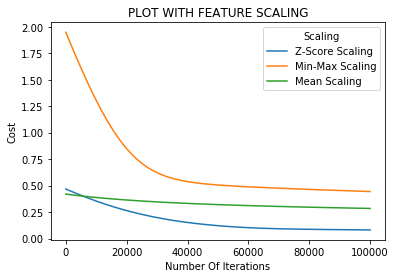


[Time Analysis]:
CPU times: user 45.9 s, sys: 479 ms, total: 46.4 s
Wall time: 25.3 s


In [225]:
%%time

# parameters
num_iters = 100000
learning_rate = 0.0001

# call functions
X_train_zscaled = zscoreFeatureScaling(X_train)
X_train_mmscaled = minMaxFeatureScaling(X_train)
X_train_meanscaled = meanFeatureScaling(X_train)
X_test_zscaled = zscoreFeatureScaling(X_test)
X_test_mmscaled = minMaxFeatureScaling(X_test)
X_test_meanscaled = meanFeatureScaling(X_test)

# plot cost graph with zscore feature scaling
theta, cost = logisticRegression(X_train_zscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n\n[Error Analysis With Z-score Scaling]:")
errorAnalysis(X_test_zscaled, Y_test, theta)
print('[Theta]:\n', theta)


# plot cost graph with min max feature scaling 
theta, cost = logisticRegression(X_train_mmscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n\n[Error Analysis With MinMax Scaling]:")
errorAnalysis(X_test_mmscaled, Y_test, theta)
print('[Theta]:\n', theta)


# plot cost graph with mean feature scaling 
theta, cost = logisticRegression(X_train_meanscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n\n[Error Analysis With Mean Scaling]:")
errorAnalysis(X_test_meanscaled, Y_test, theta)
print('[Theta]:\n', theta)


# plot labels
#plt.legend(['Unscaled','Z-Score Scaling','Min-Max Scaling','Mean Scaling'],loc = 'best', title = 'Scaling')
plt.legend(['Z-Score Scaling','Min-Max Scaling','Mean Scaling'],loc = 'best', title = 'Scaling')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT WITH FEATURE SCALING')
plt.show()


print("\n[Time Analysis]:")

##### Step 8: Observe effect of varying $\alpha$ on the cost, '$J$'

[Minimum Costs]:
0.01  =>  0.05362653187142714
0.005  =>  0.058277789026378216
0.001  =>  0.07168280222630782
0.0005  =>  0.08136700768633784
0.0001  =>  0.26387459739153124
5e-05  =>  0.35370550797491446
1e-05  =>  0.4430887922216463
5e-06  =>  0.4550063394840321
1e-06  =>  0.4647031921193471


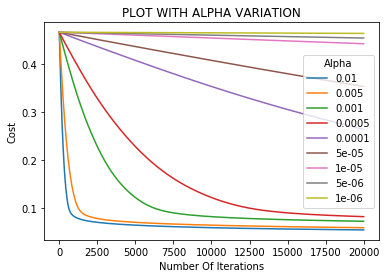


[Time Analysis]:
CPU times: user 28.7 s, sys: 306 ms, total: 29 s
Wall time: 16.2 s


In [222]:
%%time

num_iters = 20000

# generate learning rates
alphas = [1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
print('[Minimum Costs]:')

# perform logistic regression and get costs for each alpha
for alpha in alphas:
    theta, cost = logisticRegression(X_train_zscaled, Y_train, alpha, num_iters)
    cost = list(cost)
    
    # plot the costs
    num_iterations = [x for x in range(1, num_iters+1)]
    plt.plot(num_iterations, cost, label = alpha)
    plt.xlabel('Number Of Iterations')
    plt.ylabel('Cost')

    # print the final costs
    print(alpha, ' => ', cost[-1])
    
# plot the graphs
plt.legend(loc = 'best', title = 'Alpha')
plt.title('PLOT WITH ALPHA VARIATION')
plt.show()


print("\n[Time Analysis]:")

##### Step 9: Perform Logistic Regression With Regularisation

In [232]:
def differentialRegularisation(theta, X, Y, alpha, lambd):
    mX = X.shape[0]
    diff = (alpha/mX) * np.dot(np.transpose(X), 
                           np.subtract(hypothesis(theta, X), Y))
    diff = np.add(np.dot((alpha/mX),np.dot(lambd,theta)), diff)
    return diff

def BGDWithRegularisation(theta, alpha, num_iters, h, X, Y, n, lambd):
    # cost is a 1-D matrix of size num_iters, all originally 1s
    cost = np.ones(num_iters)

    # for each iteration
    for i in range(0, num_iters):
        # update theta
        diff = differentialRegularisation(theta, X, Y, alpha, lambd)
        theta = np.subtract(theta,diff)
        
        # get new hypothesis and store cost for this iteration
        cost[i] = cost_function(theta, X, Y)
        
    # convert theta into 1 row and n+1 columns and return with cost
    theta = np.reshape(theta, (1, n+1))
    return theta, cost


In [233]:
def logisticRegressionWithRegularisation(X, y, alpha, num_iters, lambd):
    # n is number of columns in X
    n = X.shape[1]
    
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    
    # initializing the parameter vector with 0s and calculate initial hypothesis
    theta = np.zeros(n+1)
    h = hypothesis(theta, X)
    
    # perform batch gradient descent and return theta and cost
    theta, cost = BGDWithRegularisation(theta, alpha, num_iters, h, X, y, n, lambd)
    return theta, cost

[Theta Values For Regression Without Regularisation]:
  [[ 0.37667016  0.68438475  0.68083644  0.65725592  0.67039782  0.36238729
   0.17810429  0.24389764  0.44776813  0.18915664 -0.03919709  0.50240281
   0.24780712  0.48076725  0.56662437  0.2095758  -0.12084489 -0.1347501
   0.04012822  0.10468298 -0.2164627   0.72068065  0.72760796  0.69179845
   0.69818538  0.57068771  0.33118116  0.31930389  0.51875083  0.4540997
   0.22069095]]

[Error Analysis Without Regularisation]:
% Correctly Classified =>  91.22807017543859


[Theta Values For Regression With Regularisation]:
  [[-0.1077407   0.21201414  0.20693989  0.21098424  0.20268448  0.10351937
   0.10422945  0.15432203  0.20980943  0.04460545 -0.06918469  0.1669468
  -0.00917799  0.14904298  0.15950766 -0.00460843 -0.02547265 -0.03257038
   0.05478927 -0.04728938 -0.08106232  0.24232415  0.22304295  0.23637288
   0.2217292   0.18340184  0.13792181  0.16538669  0.23516082  0.133872
   0.077248  ]]

[Error Analysis With Regularisatio

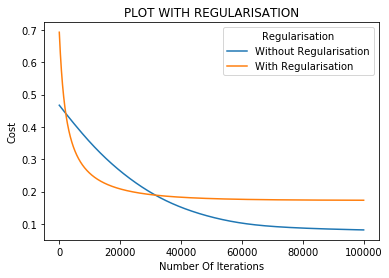


[Time Analysis]:
CPU times: user 30.6 s, sys: 208 ms, total: 30.8 s
Wall time: 16.2 s


In [235]:
%%time

# parameters
num_iters = 100000
learning_rate = 0.0001
lambd = 100

# call function for normal
theta, cost = logisticRegression(X_train_zscaled, Y_train, learning_rate, num_iters)
print('[Theta Values For Regression Without Regularisation]:\n ', theta)

# plot cost graph for normal
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost, label = 'Without Regularisation')

# analyse error for normal
print("\n[Error Analysis Without Regularisation]:")
errorAnalysis(X_test_zscaled, Y_test, theta)

# call regularisation function
theta, cost = logisticRegressionWithRegularisation(X_train_zscaled, Y_train, learning_rate, num_iters, lambd)
print('\n\n[Theta Values For Regression With Regularisation]:\n ', theta)
plt.plot(num_iterations, cost, label = 'With Regularisation')

# output:
print("\n[Error Analysis With Regularisation]:")
errorAnalysis(X_test_zscaled, Y_test, theta)

# plot labels
plt.legend(loc = 'best', title = 'Regularisation')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT WITH REGULARISATION')
plt.show()

print("\n[Time Analysis]:")